# ARIMA预测

## 导入需要的模块

In [1]:
import itertools
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 

plt.style.use('fivethirtyeight')

E:\AnacondaEnv\Anaconda\envs\usualEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\AnacondaEnv\Anaconda\envs\usualEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\AnacondaEnv\Anaconda\envs\usualEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\AnacondaEnv\Anaconda\envs\usualEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\AnacondaEnv\Anaconda\envs\usualEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufu

## 加载数据集

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64


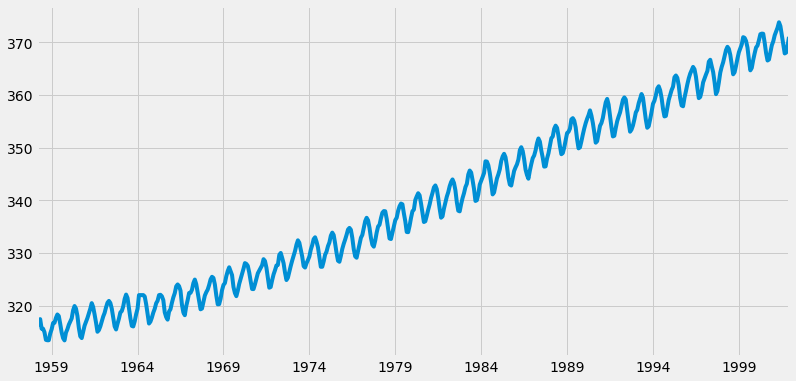

In [7]:
# 加载数据集
# 采用 python内置数据集
# 美国夏威夷莫纳罗亚火山天文台空气样本中大气二氧化碳数据
data = sm.datasets.co2.load_pandas().data
# 对时间序列重新采样
data = data['co2'].resample('MS').mean()
data = data.fillna(data.bfill())
print(data.head())
data.plot(figsize=(12,6))
plt.show()

## ARIMA模型定阶——选取AIC最小

In [9]:
# 定阶
p = d = q = range(0,2)

p_d_q = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in p_d_q]
print(p_d_q)
print(seasonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [10]:
import warnings
warnings.filterwarnings("ignore")

for param in p_d_q:
    for param_season in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(
                data,
                order=param,
                seasonal_order=param_season,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            res = model.fit()
            print('ARIMA{}x{} -AIC:{}'.format(param,param_season,res.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) -AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12) -AIC:6787.343624036742
ARIMA(0, 0, 0)x(0, 1, 0, 12) -AIC:1854.828234141261
ARIMA(0, 0, 0)x(0, 1, 1, 12) -AIC:1596.7111727641156
ARIMA(0, 0, 0)x(1, 0, 0, 12) -AIC:1058.9388921320028
ARIMA(0, 0, 0)x(1, 0, 1, 12) -AIC:1056.2878498284585
ARIMA(0, 0, 0)x(1, 1, 0, 12) -AIC:1361.6578978072075
ARIMA(0, 0, 0)x(1, 1, 1, 12) -AIC:1044.7647912934656
ARIMA(0, 0, 1)x(0, 0, 0, 12) -AIC:6881.048755158018
ARIMA(0, 0, 1)x(0, 0, 1, 12) -AIC:6072.662327703169
ARIMA(0, 0, 1)x(0, 1, 0, 12) -AIC:1379.1941067312878
ARIMA(0, 0, 1)x(0, 1, 1, 12) -AIC:1241.41747167922
ARIMA(0, 0, 1)x(1, 0, 0, 12) -AIC:1084.1085686211736
ARIMA(0, 0, 1)x(1, 0, 1, 12) -AIC:780.4295322534892
ARIMA(0, 0, 1)x(1, 1, 0, 12) -AIC:1119.5957893617642
ARIMA(0, 0, 1)x(1, 1, 1, 12) -AIC:807.091298859058
ARIMA(0, 1, 0)x(0, 0, 0, 12) -AIC:1675.8086923024293
ARIMA(0, 1, 0)x(0, 0, 1, 12) -AIC:1240.2211199194057
ARIMA(0, 1, 0)x(0, 1, 0, 12) -AIC:633.4425586468699
ARIM

$\,ARIMA(1,1,1) \times (1,1,1,12)\,$最好

## 拟合ARIMA模型

In [13]:
model = sm.tsa.statespace.SARIMAX(data,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False,enforce_stationarity=False)
res = model.fit()
print(res.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3183      0.092      3.443      0.001       0.137       0.499
ma.L1         -0.6255      0.077     -8.165      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.812      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


## 检测模型——保证残差稳定

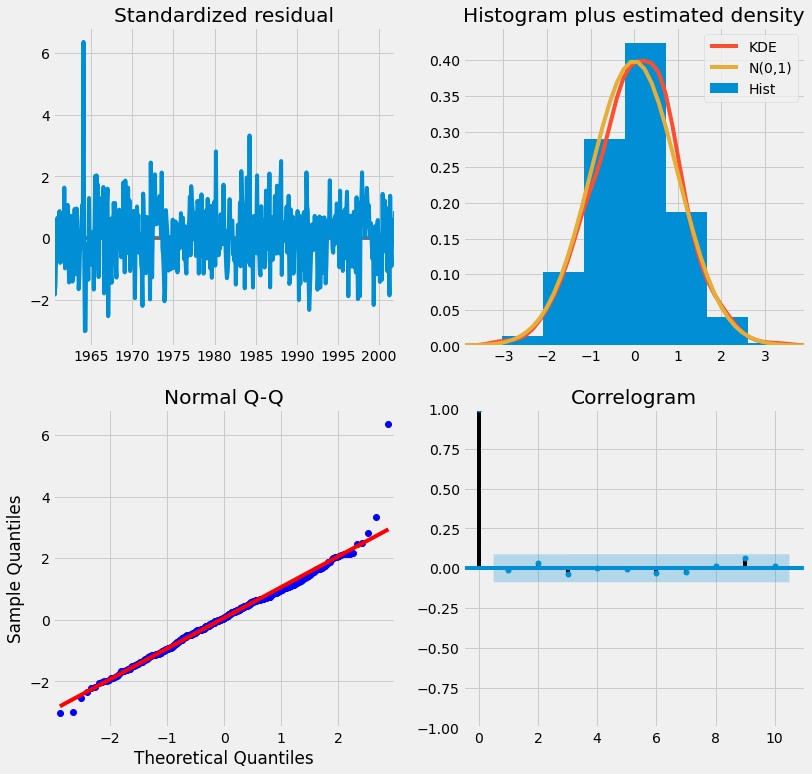

In [14]:
res.plot_diagnostics(figsize=(12,12))
plt.show()

## 预测

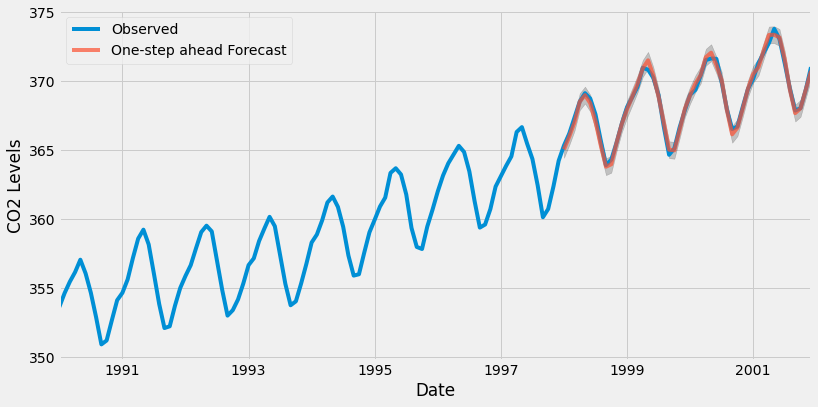

In [15]:
pred = res.get_prediction(start=pd.to_datetime('1998-01-01'),dynamic=False)
pred_ci = pred.conf_int()
ax = data['1990':].plot(label='Observed',figsize=(12, 6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
 
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
 
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
 
plt.show()

In [16]:
data_forecasted = pred.predicted_mean
data_truth = data['1998-01-01':]
 
# Compute the mean square error
mse = ((data_forecasted - data_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07
